
### Identify the relationship Between Consumer Demographics and Credit Card Usage Behaviour.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv("Data_Set.csv")
data.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
#Creating a subset from data with possible demographic features
data2 = data[['region', 'gender', 'age','agecat', 'ed', 'edcat', 'jobcat', 'retire', 'income', 
             'inccat', 'debtinc', 'creddebt', 'othdebt', 'marital', 'reside', 'homeown', 'hometype',
              'active', 'cardspent','card2spent']]
data2.head()

,region,gender,age,agecat,ed,edcat,jobcat,retire,income,inccat,debtinc,creddebt,othdebt,marital,reside,homeown,hometype,active,cardspent,card2spent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,0.0,31.0,2.0,11.1,1.20,2.24,0.0,3.0,0.0,2.0,0.0,81.66,67.80
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,15.0,1.0,18.6,1.22,1.57,0.0,2.0,1.0,3.0,1.0,42.60,34.94
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,35.0,2.0,9.9,0.93,2.54,1.0,3.0,1.0,1.0,0.0,184.22,175.75
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,20.0,1.0,5.7,0.02,1.12,1.0,5.0,1.0,3.0,1.0,340.99,18.42
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,23.0,1.0,1.7,0.21,0.18,1.0,4.0,0.0,2.0,1.0,255.10,252.73


In [4]:
#Creating a separate column of totalspent with the summed values of cardspent and card2spent. The latter values are dropped
data2['totalspent'] = data2['cardspent'] + data2['card2spent']
data2 = data2.drop(['cardspent', 'card2spent'], axis =1)
data2.head()

<ipython-input-4-fde2247108a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['totalspent'] = data2['cardspent'] + data2['card2spent']


,region,gender,age,agecat,ed,edcat,jobcat,retire,income,inccat,debtinc,creddebt,othdebt,marital,reside,homeown,hometype,active,totalspent
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,0.0,31.0,2.0,11.1,1.20,2.24,0.0,3.0,0.0,2.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,15.0,1.0,18.6,1.22,1.57,0.0,2.0,1.0,3.0,1.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,35.0,2.0,9.9,0.93,2.54,1.0,3.0,1.0,1.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,20.0,1.0,5.7,0.02,1.12,1.0,5.0,1.0,3.0,1.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,23.0,1.0,1.7,0.21,0.18,1.0,4.0,0.0,2.0,1.0,507.83


In [5]:
#The data types of each columns
data2.dtypes

region        float64
gender        float64
age           float64
agecat        float64
ed            float64
edcat         float64
jobcat        float64
retire        float64
income        float64
inccat        float64
debtinc       float64
creddebt      float64
othdebt       float64
marital       float64
reside        float64
homeown       float64
hometype      float64
active        float64
totalspent    float64
dtype: object

All the columns are of float64 type

In [6]:
#Checking for any null values
data.isnull().sum()

custid         0
region         0
townsize       0
gender         0
age            0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 130, dtype: int64

In [7]:
data2.describe()

,region,gender,age,agecat,ed,edcat,jobcat,retire,income,inccat,debtinc,creddebt,othdebt,marital,reside,homeown,hometype,active,totalspent
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000
mean,3.00140,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.147600,54.759600,2.392200,9.954160,1.857364,3.654456,0.480200,2.204000,0.62960,1.84260,0.466000,498.07863
std,1.42176,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.354739,55.377511,1.221261,6.399783,3.415789,5.395214,0.499658,1.393977,0.48296,0.91673,0.498893,351.52927
min,1.00000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.00000,0.000000,8.11000
25%,2.00000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.000000,24.000000,1.000000,5.100000,0.390000,0.980000,0.000000,1.000000,0.00000,1.00000,0.000000,276.28250
50%,3.00000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.000000,38.000000,2.000000,8.800000,0.930000,2.100000,0.000000,2.000000,1.00000,2.00000,0.000000,414.25000
75%,4.00000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.000000,67.000000,3.000000,13.600000,2.060000,4.310000,1.000000,3.000000,1.00000,2.00000,1.000000,615.56250
max,5.00000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.000000,1073.000000,5.000000,43.100000,109.070000,141.460000,1.000000,9.000000,1.00000,4.00000,1.000000,4881.05000


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      5000 non-null   float64
 1   gender      5000 non-null   float64
 2   age         5000 non-null   float64
 3   agecat      5000 non-null   float64
 4   ed          5000 non-null   float64
 5   edcat       5000 non-null   float64
 6   jobcat      5000 non-null   float64
 7   retire      5000 non-null   float64
 8   income      5000 non-null   float64
 9   inccat      5000 non-null   float64
 10  debtinc     5000 non-null   float64
 11  creddebt    5000 non-null   float64
 12  othdebt     5000 non-null   float64
 13  marital     5000 non-null   float64
 14  reside      5000 non-null   float64
 15  homeown     5000 non-null   float64
 16  hometype    5000 non-null   float64
 17  active      5000 non-null   float64
 18  totalspent  5000 non-null   float64
dtypes: float64(19)
memory usage

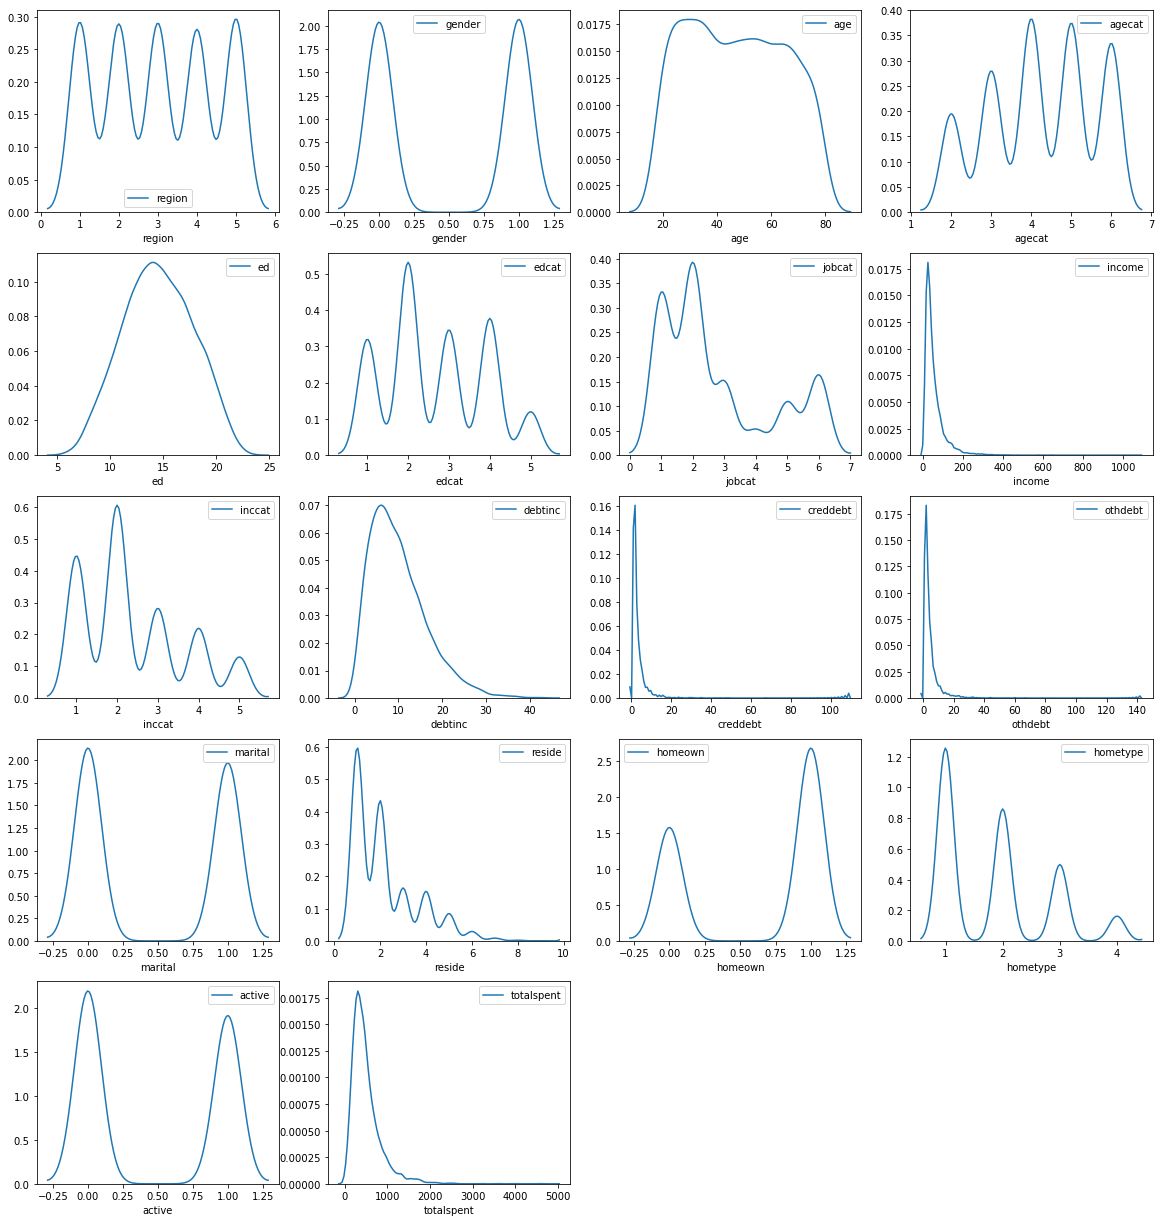

In [9]:
#plotting various attributes
plt.figure(figsize=(20,35))
data3 = data2.drop(['retire'], axis =1)
for i, col in enumerate(data3.columns):
    if data2[col].dtype != 'object':
        ax = plt.subplot(8, 4, i+1)
        sns.kdeplot(data2[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

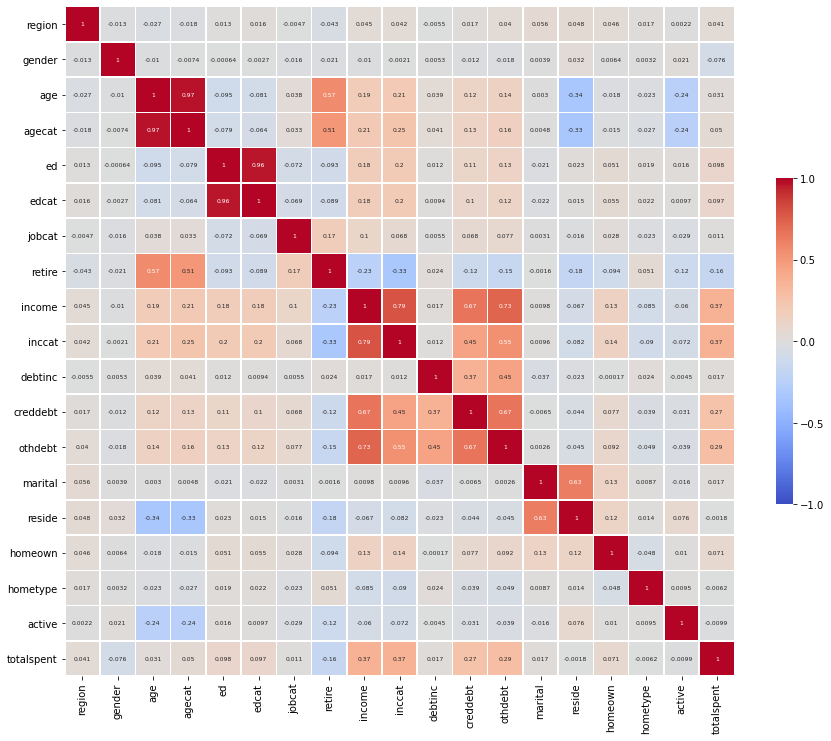

In [10]:
#plotting a correlation matrix between the various attributes of the data subset
import seaborn as sns

corr_matrix = data2.corr()
f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(corr_matrix,
        #mask = mask,
        square = True,
        linewidths = .5,
        cmap = 'coolwarm',
        cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
        vmin = -1, vmax = 1,
        annot = True,
        annot_kws = {'size':6}
                     )
#add the column names as labels
#ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize= 15)
#ax.set_xticklabels(corr_matrix.columns, fontsize= 15)
#sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

It can be observed that the total spent amount has a positive correlation with attributes such as 'income', 'income category', 'credit debt', and 'other debt'. 
Also, the total spent has a slightly negative correlation with attributes such as 'gender' and 'retire'.


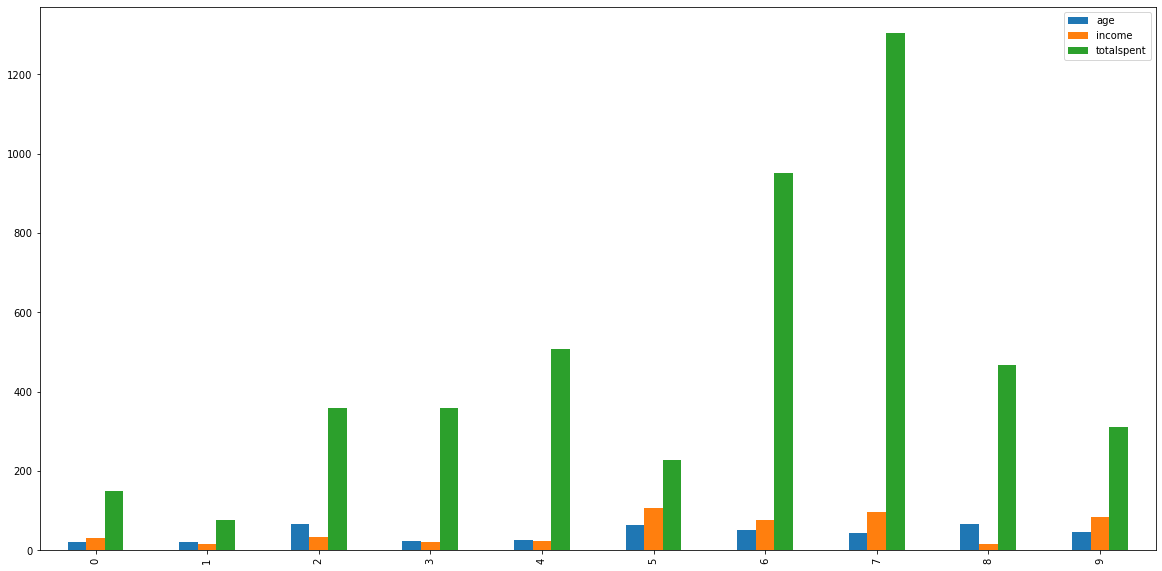

In [11]:
#Plotting a sample bar graph with age, income and total spent for the first ten values of the dataset
data2[['age', 'income', 'totalspent']][:10].plot(kind = 'bar', figsize = (20,10))


Text(0.5, 0, 'Gender')

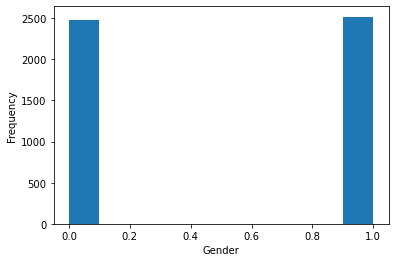

In [12]:
#Plotting the gender categories
data2['gender'].plot(kind = 'hist')
plt.xlabel("Gender")

In [13]:
data2['gender'].value_counts()

1.0    2518
0.0    2482
Name: gender, dtype: int64

The distribution of gender among the dataset is similar and is approximately 2500 in each group

Text(0, 0.5, 'Totalspent')

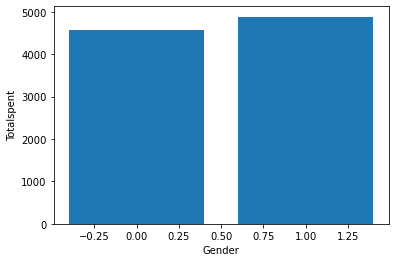

In [14]:
#Plotting gender vs totalspent
plt.bar(data2.gender, data2.totalspent)
plt.xlabel('Gender')
plt.ylabel('Totalspent')

It can be observed that female spends slightly more than men

Text(0.5, 0, 'Gender')

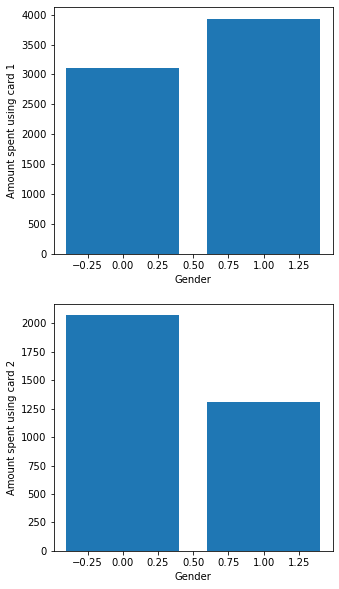

In [15]:
fig, ax = plt.subplots(1,2, figsize = (5,10))
plt.subplot(2,1,1)
card1 = plt.bar(data2.gender, data.cardspent)
plt.ylabel('Amount spent using card 1')
plt.xlabel('Gender')
plt.subplot(2,1,2)
card2 = plt.bar(data2.gender, data.card2spent)
plt.ylabel('Amount spent using card 2')
plt.xlabel('Gender')

Observing the spent pattern on both cards separately, it is observed that females spend more using card1 with monthly spent amount approximately equal to $3750 

Whereas using card 2, males have a higher spent amount which approximately equals to $2000 per month

Overall, it is seen that females has a higher total spent amount compared to men for the previous month.

Text(0, 0.5, 'Totalspent')

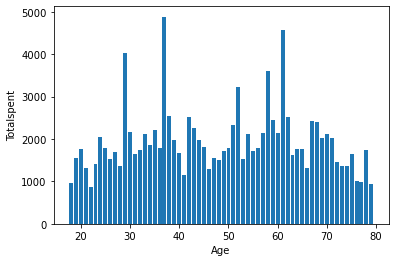

In [16]:
#Plotting age vs total spent
plt.bar(data2.age, data2.totalspent)
plt.xlabel('Age')
plt.ylabel('Totalspent')

Text(0.5, 0, 'Age category')

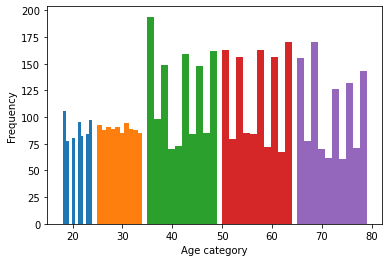

In [17]:
data.groupby('agecat').age.plot(kind='hist')
plt.xlabel('Age category')

From this graph, we can observe that there are no cardholders with age < 18 and most cardholders belong to the age category 
35-49, 50-64 and >65

In [18]:
#It shows the no of people belonging to different age categories
data['agecat'].value_counts()

4.0    1222
5.0    1195
6.0    1068
3.0     893
2.0     622
Name: agecat, dtype: int64

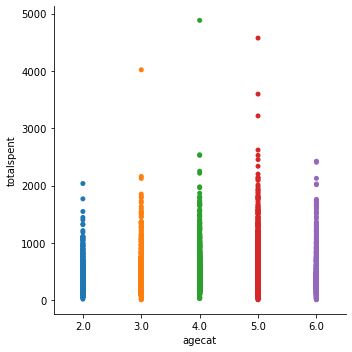

In [19]:
#Plotting age category vs total spent
sns.catplot(x="agecat", y="totalspent", jitter=False, data=data2)

It can be observed that people belonging to age category 5 (50-64) has highest total spent followed by age category 4 (35-49) and 6 (>65) respectively. Few people belonging to categories 3 (25-34), 4 (35-49) and 5 (50-64) spent more than $3000 last month using their credit card.

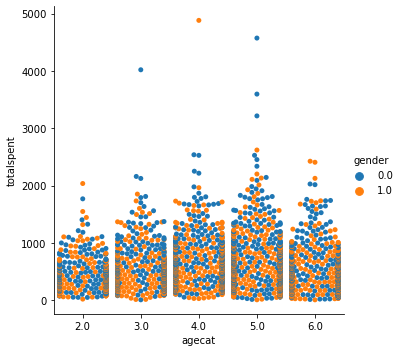

In [20]:
#Plotting age category to totalspent wrt gender
sns.catplot(x="agecat", y="totalspent", hue="gender", kind="swarm", data=data2)

The gender distribution in different age categories are almost similar

The highest spender is a female belonging to category 4 (35-49)  who spends around $4900 per month

Text(0, 0.5, 'Totalspent')

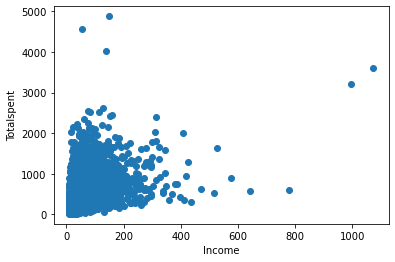

In [21]:
#Plotting between income and totalspent
plt.scatter(data2.income, data2.totalspent)
plt.xlabel('Income')
plt.ylabel('Totalspent')

         It can be observed that most of them has a monthly income of $200,000 and spent around $2000 last month with their credit card

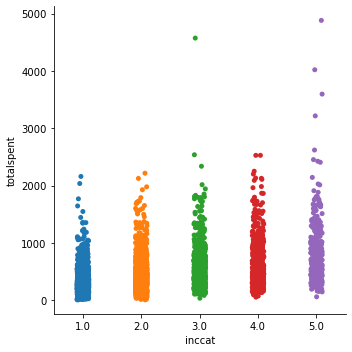

In [22]:
#Plotting inccat to total spent
sns.catplot(x="inccat", y="totalspent", data=data2)

    It can be infered that most of the people have a spend amount of $2000 wrt to their income.
Some people in category 5 (> $125,000) tend to spend more, upto $5000 for the previous month

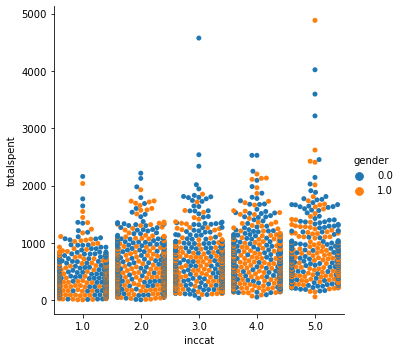

In [23]:
#Plotting income category to total spent wrt gender
sns.catplot(x="inccat", y="totalspent", hue="gender", kind="swarm", data=data2)

    Both males and females have a similar distribution

    The highest spender is a female who belongs to category 5 (Income > $125,000 ) and spends around $4900 per month

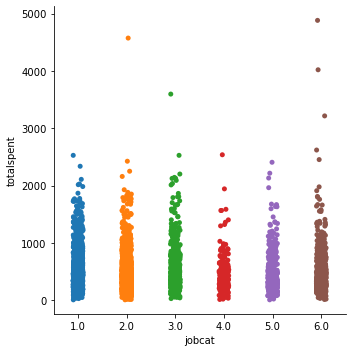

In [24]:
#Plotting between jobcat and totalspent
sns.catplot(x="jobcat", y="totalspent", data=data2)

Most of the people have a total spent less than $2500. 

Very few people spend more than $2500 and they are mostly from category 6 ie, Operation, Fabrication and General labour

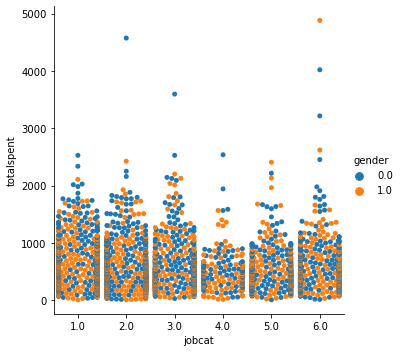

In [25]:
#Plotting job category to total spent wrt gender
sns.catplot(x="jobcat", y="totalspent", hue="gender", kind="swarm", data=data2)

Comparing the job category and total spent wrt gender, it is seen that both genders have a similar distribution

In category 1 (ManagerialandProfessional), females distribution is found to be more prominent.

The highest spender is a female who belongs to category 6 (Operation,Fabrication,General Labor) and spends around $4900 per month

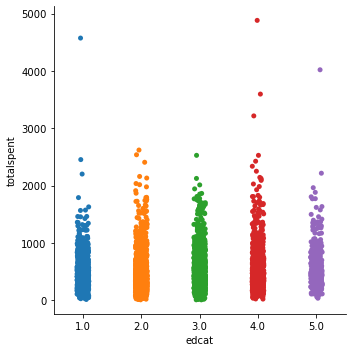

In [26]:
#Plotting edcat to the total spent
sns.catplot(x="edcat", y="totalspent", data=data2)

Most of the people belong to category 4 (College degree). 

The total spent is around $2500 for people belonging to various educational categories.
Very few people spend more than that and they mostly belong to category 4 ie, have a college degree

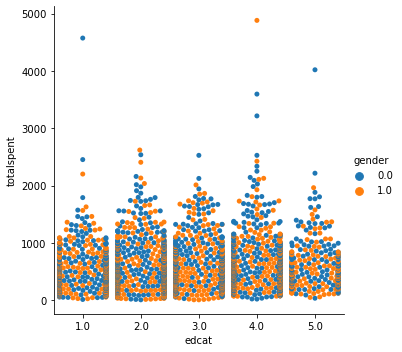

In [27]:
#Plotting education category to total spent wrt gender
sns.catplot(x="edcat", y="totalspent", hue="gender", kind="swarm", data=data2)

Both males and females have a similar distribution

The highest spender is a female who belongs to category 4 (College degree) and spends around $4900 per month

Text(0, 0.5, 'Totalspent')

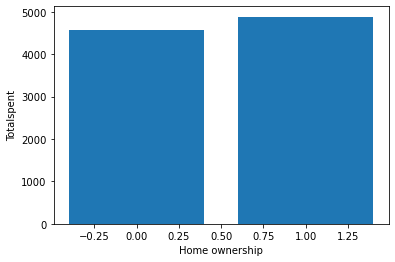

In [34]:
#Plotting between homeown and totalspent
plt.bar(data2.homeown, data2.totalspent)
plt.xlabel('Home ownership')
plt.ylabel('Totalspent')

The spending pattern is almost similar for people who own a house and rent a house

The spent amount is slightly higher for people who own their house

Text(0, 0.5, 'Totalspent')

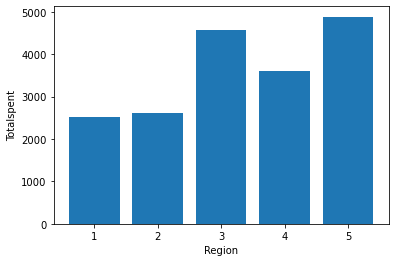

In [29]:
#Plotting between region and total spent
plt.bar(data.region, data2.totalspent)
plt.xlabel('Region')
plt.ylabel('Totalspent')

It can be infered that people from region 5 (Zone 5) spend more using their credit cards followed by people from region 3 (Zone 3). 

People from region 1 (Zone 1) spend the lowest

Text(0, 0.5, 'Totalspent')

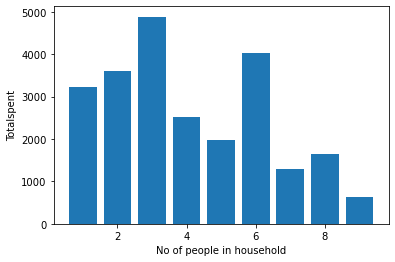

In [30]:
#Plotting between reside and total spent
plt.bar(data2.reside, data2.totalspent)
plt.xlabel('No of people in household')
plt.ylabel('Totalspent')

    Reside refers to the number of people in the household. It can be inferred that families with 3 and 6 members have more spending pattern compared to others. The spending amount is between $3000 and $3500 for the last month for households with members 1 and 2

Text(0, 0.5, 'Totalspent')

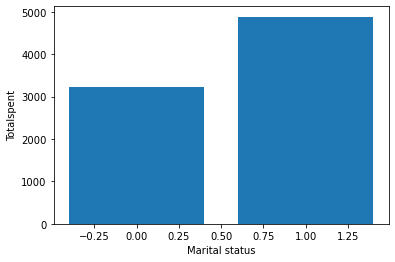

In [31]:
#Plotting between marital status and total spent
plt.bar(data2.marital, data2.totalspent)
plt.xlabel('Marital status')
plt.ylabel('Totalspent')

It can be inferred that most of the users who have a higher spent amount are married

Text(0, 0.5, 'Totalspent')

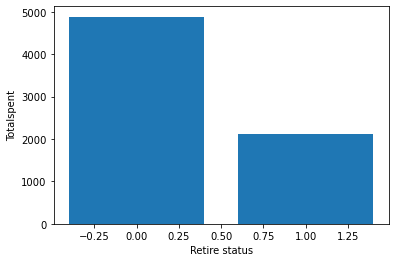

In [32]:
#Plotting between retire and totalspent
plt.bar(data2.retire, data2.totalspent)
plt.xlabel('Retire status')
plt.ylabel('Totalspent')

Most of the users who spend more using their credit cards are not retired. 

Retired people spent only around $2000 last month using their credit cards

Text(0, 0.5, 'Totalspent')

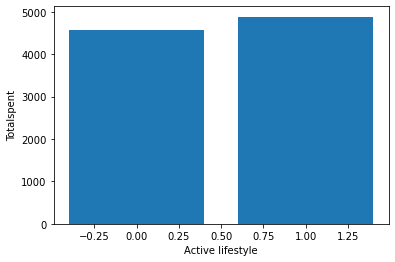

In [33]:
#Plotting between active lifestyle and total spent
plt.bar(data2.active, data2.totalspent)
plt.xlabel('Active lifestyle')
plt.ylabel('Totalspent')

The spending pattern is almost similar forpeople who have a active lifestyle and those who doesn't

The spent amount is slightly higher for people who has an active lifestyle

##INTERPRETATIONS:

1) Both males and females are equally distributed among the dataset. It is seen that females have a higher total spent amount compared to males.

2) Most of the cardholders belong to age category 4 (35-49 years) and the people who has a higher total spent amount belongs to category 5 (50-64 years)

3) Most of the cardholders have a monthly income of 200,000 dollars and spent around 2000 dollars last month with their credit card. Few people belonging to income category 5 (>125,000 dollars) tend to spend more, upto $5000 last month.

4) People who have a higher total spent amount ie, more than $2500 mostly belong to job category 6 ie, Operation, Fabrication and General labour.

5) Comparing education category, the total spent is around $2500 for people belonging to various educational categories. Very few people spend more than that and they mostly belong to category 4 ie, have a college degree.

6) Comparing gender, age category, job category, income category and eduction category, it is observed that the highest spender for the previous month is a female who belongs to the age group 35-49, who has a College degree and works in the Operation, Fabrication and Labor sector with an income of more than $125,000. She spent about 4900 dollars last month.

7) Although, the spending pattern is almost similar for people who own a house and rent a house,the total spent amount is slightly higher for people who own their house.

8) Most of the people who have a higher spent amount belong to region 5 (Zone 5).

9) It is observed that families with 3 members had a higher total amount spent for the previous month compared to others.

10) Most of the people who spent more for the previous month are married.

11) Most of the cardholders with higher spent are not retired. Retired people spent about $2000 last month.

12) The total spent amount for last month is similar for people who has an active lifestyle and who doesn't. But it's slightly higher for people who maintain an active lifestyle.